# Import all the libraries

Basic

In [7]:
import numpy as np         
import pandas as pd  

Visualization

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

Train Test split for training and testing of data

In [9]:
from sklearn.model_selection import train_test_split

Mathematics and Algorithms

In [10]:
#function to get a mode of a dataset
from statistics import mode

#normalizing dataset
from sklearn.preprocessing import StandardScaler

#For resampling process to change the ratio of imbalanced ratio of the classes testing various ratios
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression

#resampling
from imblearn.over_sampling import SMOTE

# Importing All the CSV files

In [44]:
train = pd.read_csv('train.csv')
campaign = pd.read_csv('campaign_data.csv')
coupon = pd.read_csv('coupon_item_mapping.csv')
demograph = pd.read_csv('customer_demographics.csv')
transaction = pd.read_csv('customer_transaction_data.csv')
item = pd.read_csv('item_data.csv')

Making the dictionary to save all the data "To update data and save them easily, a dictionary is created."

In [45]:
tables_data = {}
tables_data['train'] = train
tables_data['campaign'] = campaign
tables_data['coupon'] = coupon 
tables_data['demograph'] = demograph
tables_data['transaction'] = transaction 
tables_data['item'] = item

# Data Analysis

Train data

In [14]:
train.head(11) #Gives the first 10 values of data

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0
5,11,11,795,793,0
6,14,9,444,590,0
7,15,29,538,368,0
8,17,30,857,523,0
9,19,2,559,679,0


In [26]:
train.info() #Gives the information about train_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 78369 non-null  int64
 1   campaign_id        78369 non-null  int64
 2   coupon_id          78369 non-null  int64
 3   customer_id        78369 non-null  int64
 4   redemption_status  78369 non-null  int64
dtypes: int64(5)
memory usage: 3.0 MB


In [22]:
len(train.campaign_id.unique()) #collect all the id and give exect number and length

18

In [32]:
D = train.redemption_status.value_counts() #Gives the count of 0's and 1's
D

0    77640
1      729
Name: redemption_status, dtype: int64

Text(0.5, 0, 'class')

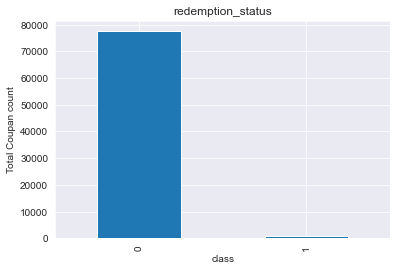

In [48]:
D.plot.bar()  #Graph
plt.title('redemption_status')
plt.ylabel('Total Coupan count')
plt.xlabel('class')

In [40]:
729/(78369)*100  #Getting Percentage of Redemption_status

0.930214753282548

We get 0.93% of coupan redemption_status

As we can see that data is havily tipped to one side we have to use either OVER or UNDER sampling

if we have to make class 0 data as class 1 to fit the orignal data we use (Under Sampling)
if we have to make class 1 data as class 0 to fit the orignal data we use (Over Sampling)

Let us see each campaign have same set of coupons or do coupons overlap in different campaigns

In [81]:
coupon_use = {}
for coupon in train.coupon_id.unique():
    camp =  len(train[train.coupon_id==coupon].campaign_id.unique())  #camp = number of camp use the coupon
    if camp in coupon_use.keys():        #collect coupon ids that were used camp times
         coupon_use[camp].append(coupon)
    else:
         coupon_use[camp] = [coupon]

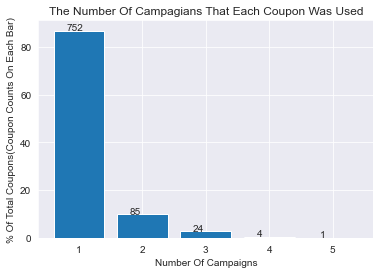

In [82]:
coupon_freq = {}  #coupon_freq 

for camp in coupon_use.keys():
    coupon_freq[camp]= len(coupon_use[camp])/len(train.coupon_id.unique())*100

plt.bar(coupon_freq.keys(),coupon_freq.values())

# Text on the top of each barplot
label = [len(x) for x in coupon_use.values()]
x_loc = np.array([x for x in coupon_freq.keys()])-0.2
y_loc = np.array([x for x in coupon_freq.values()]) + 0.1
for i in range(5):
    plt.text(x = x_loc[i] , y = y_loc[i], s = label[i], size = 10)
plt.title('The number of campagians that each coupon was used'.title())
plt.ylabel('% of total coupons(coupon counts on each bar)'.title())
plt.xlabel('number of campaigns'.title())
plt.show()

Campaign Data    

In [84]:
campaign

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13
5,22,X,16/09/13,18/10/13
6,18,X,10/08/13,04/10/13
7,19,Y,26/08/13,27/09/13
8,17,Y,29/07/13,30/08/13
9,16,Y,15/07/13,16/08/13


In [94]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    28 non-null     int64 
 1   campaign_type  28 non-null     object
 2   start_date     28 non-null     object
 3   end_date       28 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.0+ KB


In [97]:
len(campaign.campaign_id.unique())

28

In [89]:
D = campaign.campaign_type.value_counts()
D

Y    22
X     6
Name: campaign_type, dtype: int64

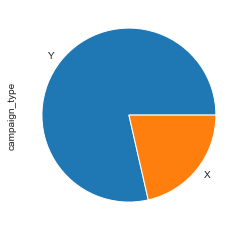

In [93]:
D.plot.pie()